In [212]:
import pandas as pd
df=pd.read_csv('SOCATv2024_Indian1.csv',low_memory=False)

In [213]:
df=df.rename(columns={'longitude [dec.deg.E]' : 'Lon', 'latitude [dec.deg.N]' : 'Lat',
                      'yr':'year',
                      'mon':'month',
                      'ss':'second',
                      'hh':'hour',
                      'mm':'minute',
                      'sal' : 'Salinity',
                      'SST [deg.C]' : 'SST',
                      'PPPP [hPa]' : 'Atmospheric_Pressure',
                      'pCO2water_SST_wet [uatm]':'pCO2water_SST_wet'})

In [214]:
data=df[['Lat', 'Lon', 'day', 'month', 'year', 'hour', 'minute', 'second', 'Salinity', 'SST', 'Atmospheric_Pressure', 'pCO2water_SST_wet']].copy()

In [215]:
arabian_sea_lat_range = (0, 22)
arabian_sea_lon_range = (50, 75)

In [216]:
# Filter data for Arabian sea
arabian_sea = data[(data['Lat'] >= arabian_sea_lat_range[0]) & (data['Lat'] <= arabian_sea_lat_range[1]) &
                      (data['Lon'] >= arabian_sea_lon_range[0]) & (data['Lon'] <= arabian_sea_lon_range[1])].reset_index()

In [222]:
arabian_sea=arabian_sea.drop('index', axis=1)

arabian_sea.loc[:,'minute']=0

arabian_sea.loc[:, 'second']=0
arabian_sea['second'] = arabian_sea['second'].astype(int)

In [224]:
arabian_sea

,Lat,Lon,day,month,year,hour,minute,second,Salinity,SST,Atmospheric_Pressure,pCO2water_SST_wet
0,20.496,65.748,15,5,1997,23,0,0,36.450,28.65,1007.8,NaN
1,20.493,65.748,15,5,1997,23,0,0,36.450,28.65,1007.8,NaN
2,20.489,65.749,15,5,1997,23,0,0,36.450,28.65,1007.8,NaN
3,20.486,65.749,15,5,1997,23,0,0,36.450,28.65,1007.8,NaN
4,20.482,65.750,15,5,1997,23,0,0,36.450,28.65,1007.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
93566,0.100,52.240,29,10,1999,8,0,0,35.369,27.23,1011.2,NaN
93567,0.080,52.240,29,10,1999,8,0,0,35.368,27.24,1011.3,NaN
93568,0.050,52.250,29,10,1999,8,0,0,35.367,27.25,1011.2,NaN
93569,0.030,52.250,29,10,1999,8,0,0,35.368,27.23,1011.1,NaN


In [226]:
arabian_sea=arabian_sea.drop(['Lat','Lon', 'day', 'month', 'hour', 'minute', 'second'], axis=1)

In [228]:
arabian_sea

,year,Salinity,SST,Atmospheric_Pressure,pCO2water_SST_wet
0,1997,36.450,28.65,1007.8,NaN
1,1997,36.450,28.65,1007.8,NaN
2,1997,36.450,28.65,1007.8,NaN
3,1997,36.450,28.65,1007.8,NaN
4,1997,36.450,28.65,1007.8,NaN
...,...,...,...,...,...
93566,1999,35.369,27.23,1011.2,NaN
93567,1999,35.368,27.24,1011.3,NaN
93568,1999,35.367,27.25,1011.2,NaN
93569,1999,35.368,27.23,1011.1,NaN


In [230]:
arabian_sea.isna().sum()

year                        0
Salinity                  871
SST                         0
Atmospheric_Pressure    24873
pCO2water_SST_wet       78077
dtype: int64

In [232]:
arabian_sea['year'].value_counts()

year
1995    64837
1997    15679
2018     8285
1999     2607
2014      640
1963      451
1962      418
1991      414
1992      240
Name: count, dtype: int64

In [234]:
# Splitting data
train_df = arabian_sea[arabian_sea['year'] != 2014].reset_index(drop=True)
test_df = arabian_sea[arabian_sea['year'] == 2014].reset_index(drop=True)

In [236]:
train_df.drop(['year'], axis=1, inplace=True)

In [238]:
test_df.drop(['year'], axis=1, inplace=True)

In [240]:
train_df

,Salinity,SST,Atmospheric_Pressure,pCO2water_SST_wet
0,36.450,28.65,1007.8,NaN
1,36.450,28.65,1007.8,NaN
2,36.450,28.65,1007.8,NaN
3,36.450,28.65,1007.8,NaN
4,36.450,28.65,1007.8,NaN
...,...,...,...,...
92926,35.369,27.23,1011.2,NaN
92927,35.368,27.24,1011.3,NaN
92928,35.367,27.25,1011.2,NaN
92929,35.368,27.23,1011.1,NaN


In [242]:
train_df.isna().sum()

Salinity                  871
SST                         0
Atmospheric_Pressure    24873
pCO2water_SST_wet       78057
dtype: int64

In [244]:
test_df

,Salinity,SST,Atmospheric_Pressure,pCO2water_SST_wet
0,34.94,29.62,1010.0,400.5
1,34.94,29.61,1010.0,NaN
2,34.94,29.61,1010.4,NaN
3,34.94,29.62,1010.0,400.4
4,34.94,29.60,1010.4,400.4
...,...,...,...,...
635,34.88,29.42,1009.6,401.4
636,34.88,29.42,1009.6,401.5
637,34.88,29.41,1009.6,401.6
638,34.88,29.41,1009.8,401.3


In [246]:
test_df.isna().sum()

Salinity                 0
SST                      0
Atmospheric_Pressure     0
pCO2water_SST_wet       20
dtype: int64

In [248]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [249]:
x = train_df.drop('pCO2water_SST_wet', axis=1)
y = train_df['pCO2water_SST_wet']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [250]:
# Fill missing values with median
median_pCO2 = y_train.median(skipna=True)
y_train.fillna(median_pCO2, inplace=True)
y_test.fillna(median_pCO2, inplace=True)

In [270]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test)

# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4,
    'alpha': 1.5,         # L1 regularization
    'lambda' : 3.0
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:8.62282	validation-rmse:8.03830
[1]	train-rmse:8.16127	validation-rmse:7.64723
[2]	train-rmse:7.76876	validation-rmse:7.31575
[3]	train-rmse:7.36215	validation-rmse:6.96548
[4]	train-rmse:7.01411	validation-rmse:6.66813
[5]	train-rmse:6.71770	validation-rmse:6.41676
[6]	train-rmse:6.50592	validation-rmse:6.24141
[7]	train-rmse:6.22729	validation-rmse:5.99977
[8]	train-rmse:6.02195	validation-rmse:5.83137
[9]	train-rmse:5.84947	validation-rmse:5.69192
[10]	train-rmse:5.72583	validation-rmse:5.59387
[11]	train-rmse:5.58631	validation-rmse:5.48477
[12]	train-rmse:5.46496	validation-rmse:5.39017
[13]	train-rmse:5.36445	validation-rmse:5.31292
[14]	train-rmse:5.27409	validation-rmse:5.24093
[15]	train-rmse:5.20942	validation-rmse:5.18653
[16]	train-rmse:5.15581	validation-rmse:5.14284
[17]	train-rmse:5.01888	validation-rmse:5.03481
[18]	train-rmse:4.97377	validation-rmse:4.99569
[19]	train-rmse:4.93839	validation-rmse:4.96474
[20]	train-rmse:4.90244	validation-rmse:4.93740
[2

In [271]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")

Best iteration: 437


In [272]:
# Separate target variable from test_df for predictions
test_features=test_df.drop('pCO2water_SST_wet', axis=1)
test_target=test_df['pCO2water_SST_wet']

In [257]:
# Fill missing values with median
median_pCO2 = test_target.median(skipna=True)
test_target.fillna(median_pCO2, inplace=True)

In [258]:
dval1 = xgb.DMatrix(test_features, label=test_target)

In [276]:
y_pred = model.predict(dval1, iteration_range=(0, best_iteration))

testing_rmse=np.sqrt(mean_squared_error(test_target, y_pred))

print('XGBoost Regression :')
print('Testing RMSE :',testing_rmse)

XGBoost Regression :
Testing RMSE : 34.85073650747715


<Figure size 1200x600 with 0 Axes>

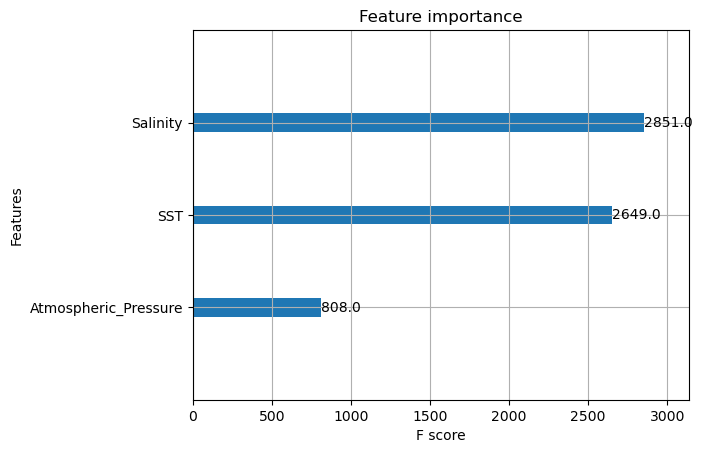

In [278]:
import xgboost as xgb
plt.figure(figsize=(12, 6))
xgb.plot_importance(model)
plt.show()

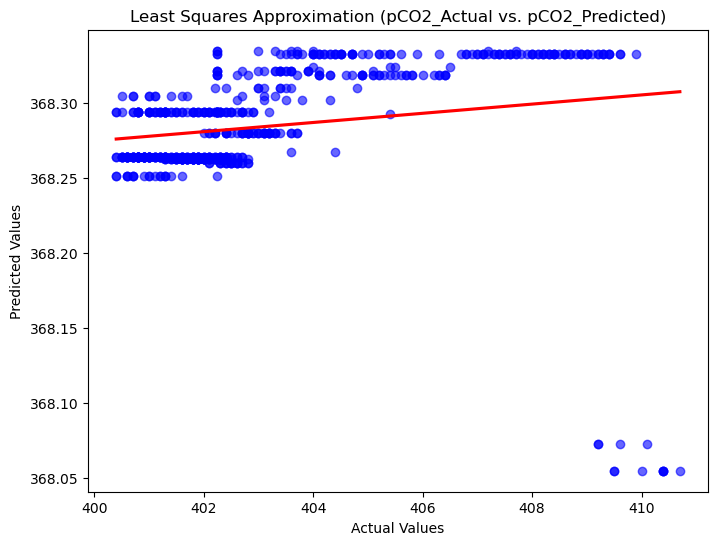

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.regplot(x=test_target, y=y_pred, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ci=None)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Least Squares Approximation (pCO2_Actual vs. pCO2_Predicted)")
plt.show()

In [114]:
arabian_sea=arabian_sea.drop(['Lat', 'Lon', 'day', 'month', 'year', 'hour', 'minute', 'second'], axis=1)

In [116]:
data=arabian_sea.to_csv('pco2_arabian_sea.csv')

### 15% Nan

In [95]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
df1=pd.read_csv('pco2_arabian_sea.csv')
df1

,Unnamed: 0,Salinity,SST,Atmospheric_Pressure,pCO2water_SST_wet
0,0,36.450,28.65,1007.8,NaN
1,1,36.450,28.65,1007.8,NaN
2,2,36.450,28.65,1007.8,NaN
3,3,36.450,28.65,1007.8,NaN
4,4,36.450,28.65,1007.8,NaN
...,...,...,...,...,...
93566,93566,35.369,27.23,1011.2,NaN
93567,93567,35.368,27.24,1011.3,NaN
93568,93568,35.367,27.25,1011.2,NaN
93569,93569,35.368,27.23,1011.1,NaN


In [97]:
df1=df1.drop('Unnamed: 0', axis=1)

nan_rows = df1[df1[['Salinity', 'Atmospheric_Pressure','pCO2water_SST_wet']].isna().any(axis=1)]

# Calculate 15% of the NaN rows
num_nan_to_select = int(0.15 * len(nan_rows))

# Randomly select 15% of NaN rows
nan_sample = nan_rows.sample(n=num_nan_to_select, random_state=42).reset_index(drop=True)

In [99]:
df1.isna().sum()

Salinity                  871
SST                         0
Atmospheric_Pressure    24873
pCO2water_SST_wet       78077
dtype: int64

In [101]:
nan_sample.isna().sum()

Salinity                  156
SST                         0
Atmospheric_Pressure     3715
pCO2water_SST_wet       11707
dtype: int64

In [103]:
non_nan_rows = df1.dropna(subset=['Atmospheric_Pressure','pCO2water_SST_wet']).reset_index(drop=True)

In [105]:
non_nan_rows.isna().sum()

Salinity                0
SST                     0
Atmospheric_Pressure    0
pCO2water_SST_wet       0
dtype: int64

In [107]:
# Combine 15% NaN rows with all non-NaN rows
new_df = pd.concat([nan_sample, non_nan_rows])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [109]:
x=new_df.drop('pCO2water_SST_wet', axis=1)
y=new_df['pCO2water_SST_wet']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)

median_pCO2=y_train.median(skipna=True)
y_train=y_train.fillna(median_pCO2)
y_test1=y_test1.fillna(median_pCO2)

import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test1)

# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:9.78384	validation-rmse:9.59693
[1]	train-rmse:9.22656	validation-rmse:9.08430
[2]	train-rmse:8.74801	validation-rmse:8.64833
[3]	train-rmse:8.39259	validation-rmse:8.30495
[4]	train-rmse:8.02596	validation-rmse:7.97895
[5]	train-rmse:7.68517	validation-rmse:7.58970
[6]	train-rmse:7.39211	validation-rmse:7.26073
[7]	train-rmse:7.14077	validation-rmse:6.98116
[8]	train-rmse:6.95301	validation-rmse:6.77262
[9]	train-rmse:6.79252	validation-rmse:6.59854
[10]	train-rmse:6.62076	validation-rmse:6.43977
[11]	train-rmse:6.42560	validation-rmse:6.32373
[12]	train-rmse:6.25429	validation-rmse:6.17491
[13]	train-rmse:6.11094	validation-rmse:6.05683
[14]	train-rmse:5.98804	validation-rmse:5.97594
[15]	train-rmse:5.90249	validation-rmse:5.90575
[16]	train-rmse:5.82884	validation-rmse:5.85222
[17]	train-rmse:5.76264	validation-rmse:5.80552
[18]	train-rmse:5.68082	validation-rmse:5.77503
[19]	train-rmse:5.56754	validation-rmse:5.73004
[20]	train-rmse:5.52315	validation-rmse:5.68136
[2

In [110]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")


y_train_pred=model.predict(dtrain, iteration_range=(0, best_iteration))
y_pred1=model.predict(dval, iteration_range=(0, best_iteration))

training_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
testing_rmse=np.sqrt(mean_squared_error(y_test1, y_pred1))

print('XGBoost Regression :')
print('Training RMSE :',training_rmse)
print('Testing RMSE :',testing_rmse)

Best iteration: 269
XGBoost Regression :
Training RMSE : 3.480122270226798
Testing RMSE : 4.297470551452826


### 30% Nan

In [114]:
import pandas as pd
df1=pd.read_csv('pCO2_arabian_sea.csv')

df1=df1.drop('Unnamed: 0', axis=1)

nan_rows = df1[df1[['Salinity', 'Atmospheric_Pressure','pCO2water_SST_wet']].isna().any(axis=1)]

# Calculate 30% of the NaN rows
num_nan_to_select = int(0.30 * len(nan_rows))

# Randomly select 30% of NaN rows
nan_sample = nan_rows.sample(n=num_nan_to_select, random_state=42).reset_index(drop=True)

# Get rows that are fully non-NaN in fCO2water_SST_wet

non_nan_rows = df1.dropna(subset=['Atmospheric_Pressure','pCO2water_SST_wet']).reset_index(drop=True)

# Combine 30% NaN rows with all non-NaN rows
new_df = pd.concat([nan_sample, non_nan_rows])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [116]:
x=new_df.drop('pCO2water_SST_wet', axis=1)
y=new_df['pCO2water_SST_wet']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test2 = train_test_split(x, y, test_size=0.2, random_state=42)

median_pCO2=y_train.median(skipna=True)
y_train=y_train.fillna(median_pCO2)
y_test2=y_test2.fillna(median_pCO2)

import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test2)

# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:9.54149	validation-rmse:9.45714
[1]	train-rmse:9.12441	validation-rmse:9.01922
[2]	train-rmse:8.71604	validation-rmse:8.60879
[3]	train-rmse:8.36475	validation-rmse:8.25770
[4]	train-rmse:8.08265	validation-rmse:7.97886
[5]	train-rmse:7.81904	validation-rmse:7.72550
[6]	train-rmse:7.59225	validation-rmse:7.50753
[7]	train-rmse:7.39923	validation-rmse:7.32895
[8]	train-rmse:7.22366	validation-rmse:7.18698
[9]	train-rmse:7.07444	validation-rmse:7.06753
[10]	train-rmse:6.90924	validation-rmse:6.90636
[11]	train-rmse:6.66786	validation-rmse:6.72101
[12]	train-rmse:6.53743	validation-rmse:6.59634
[13]	train-rmse:6.42966	validation-rmse:6.49661
[14]	train-rmse:6.33940	validation-rmse:6.41329
[15]	train-rmse:6.26534	validation-rmse:6.33940
[16]	train-rmse:6.08486	validation-rmse:6.21206
[17]	train-rmse:6.04140	validation-rmse:6.17007
[18]	train-rmse:5.91247	validation-rmse:6.09082
[19]	train-rmse:5.87860	validation-rmse:6.06054
[20]	train-rmse:5.83127	validation-rmse:6.02111
[2

In [118]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")


y_train_pred=model.predict(dtrain, iteration_range=(0, best_iteration))
y_pred2=model.predict(dval, iteration_range=(0, best_iteration))

training_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
testing_rmse=np.sqrt(mean_squared_error(y_test2, y_pred2))

print('XGBoost Regression :')
print('Training RMSE :',training_rmse)
print('Testing RMSE :',testing_rmse)

Best iteration: 301
XGBoost Regression :
Training RMSE : 3.5588769134166194
Testing RMSE : 4.368028470517418


### 45%

In [121]:
import pandas as pd
df1=pd.read_csv('pCO2_arabian_sea.csv')

df1=df1.drop('Unnamed: 0', axis=1)

nan_rows = df1[df1[['Salinity', 'Atmospheric_Pressure','pCO2water_SST_wet']].isna().any(axis=1)]

# Calculate 45% of the NaN rows
num_nan_to_select = int(0.45 * len(nan_rows))

# Randomly select 45% of NaN rows
nan_sample = nan_rows.sample(n=num_nan_to_select, random_state=42).reset_index(drop=True)

# Get rows that are fully non-NaN in fCO2water_SST_wet

non_nan_rows = df1.dropna(subset=['Atmospheric_Pressure','pCO2water_SST_wet']).reset_index(drop=True)

# Combine 45% NaN rows with all non-NaN rows
new_df = pd.concat([nan_sample, non_nan_rows])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [123]:
x=new_df.drop('pCO2water_SST_wet', axis=1)
y=new_df['pCO2water_SST_wet']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test3 = train_test_split(x, y, test_size=0.2, random_state=42)

median_pCO2=y_train.median(skipna=True)
y_train=y_train.fillna(median_pCO2)
y_test3=y_test3.fillna(median_pCO2)

import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test3)

# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:9.24421	validation-rmse:9.48407
[1]	train-rmse:8.84015	validation-rmse:9.10098
[2]	train-rmse:8.41740	validation-rmse:8.68943
[3]	train-rmse:8.05766	validation-rmse:8.33985
[4]	train-rmse:7.75008	validation-rmse:8.03923
[5]	train-rmse:7.49196	validation-rmse:7.79028
[6]	train-rmse:7.26644	validation-rmse:7.56883
[7]	train-rmse:7.08115	validation-rmse:7.38887
[8]	train-rmse:6.91961	validation-rmse:7.24087
[9]	train-rmse:6.77982	validation-rmse:7.11644
[10]	train-rmse:6.66237	validation-rmse:6.99727
[11]	train-rmse:6.56095	validation-rmse:6.89320
[12]	train-rmse:6.46137	validation-rmse:6.78839
[13]	train-rmse:6.35436	validation-rmse:6.67063
[14]	train-rmse:6.16469	validation-rmse:6.47442
[15]	train-rmse:6.08124	validation-rmse:6.38360
[16]	train-rmse:6.01221	validation-rmse:6.30665
[17]	train-rmse:5.95703	validation-rmse:6.24629
[18]	train-rmse:5.92283	validation-rmse:6.21052
[19]	train-rmse:5.77947	validation-rmse:6.06932
[20]	train-rmse:5.75220	validation-rmse:6.03989
[2

In [124]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")


y_train_pred=model.predict(dtrain, iteration_range=(0, best_iteration))
y_pred3=model.predict(dval, iteration_range=(0, best_iteration))

training_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
testing_rmse=np.sqrt(mean_squared_error(y_test3, y_pred3))

print('XGBoost Regression :')
print('Training RMSE :',training_rmse)
print('Testing RMSE :',testing_rmse)

Best iteration: 342
XGBoost Regression :
Training RMSE : 3.3866266730669636
Testing RMSE : 4.161560560111893


### 60%

In [128]:
import pandas as pd
df1=pd.read_csv('pCO2_arabian_sea.csv')

df1=df1.drop('Unnamed: 0', axis=1)

nan_rows = df1[df1[['Salinity', 'Atmospheric_Pressure','pCO2water_SST_wet']].isna().any(axis=1)]

# Calculate 60% of the NaN rows
num_nan_to_select = int(0.60 * len(nan_rows))

# Randomly select 60% of NaN rows
nan_sample = nan_rows.sample(n=num_nan_to_select, random_state=42).reset_index(drop=True)

# Get rows that are fully non-NaN in fCO2water_SST_wet

non_nan_rows = df1.dropna(subset=['Atmospheric_Pressure','pCO2water_SST_wet']).reset_index(drop=True)

# Combine 60% NaN rows with all non-NaN rows
new_df = pd.concat([nan_sample, non_nan_rows])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [130]:
x=new_df.drop('pCO2water_SST_wet', axis=1)
y=new_df['pCO2water_SST_wet']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test4 = train_test_split(x, y, test_size=0.2, random_state=42)

median_pCO2=y_train.median(skipna=True)
y_train=y_train.fillna(median_pCO2)
y_test4=y_test4.fillna(median_pCO2)

import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test4)

# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:9.09149	validation-rmse:9.75534
[1]	train-rmse:8.67873	validation-rmse:9.29498
[2]	train-rmse:8.32273	validation-rmse:8.89734
[3]	train-rmse:7.95987	validation-rmse:8.49730
[4]	train-rmse:7.65349	validation-rmse:8.15665
[5]	train-rmse:7.39320	validation-rmse:7.86607
[6]	train-rmse:7.15652	validation-rmse:7.60280
[7]	train-rmse:6.96492	validation-rmse:7.38766
[8]	train-rmse:6.79441	validation-rmse:7.19651
[9]	train-rmse:6.66050	validation-rmse:7.04519
[10]	train-rmse:6.53247	validation-rmse:6.90720
[11]	train-rmse:6.42869	validation-rmse:6.78854
[12]	train-rmse:6.33933	validation-rmse:6.68408
[13]	train-rmse:6.26444	validation-rmse:6.60262
[14]	train-rmse:6.11210	validation-rmse:6.45303
[15]	train-rmse:6.03587	validation-rmse:6.36713
[16]	train-rmse:5.99320	validation-rmse:6.32023
[17]	train-rmse:5.85852	validation-rmse:6.18415
[18]	train-rmse:5.82269	validation-rmse:6.14441
[19]	train-rmse:5.79513	validation-rmse:6.11314
[20]	train-rmse:5.67048	validation-rmse:5.98840
[2

In [131]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")


y_train_pred=model.predict(dtrain, iteration_range=(0, best_iteration))
y_pred4=model.predict(dval, iteration_range=(0, best_iteration))

training_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
testing_rmse=np.sqrt(mean_squared_error(y_test4, y_pred4))

print('XGBoost Regression :')
print('Training RMSE :',training_rmse)
print('Testing RMSE :',testing_rmse)

Best iteration: 417
XGBoost Regression :
Training RMSE : 3.3358082242142886
Testing RMSE : 3.788684895869779


### 75%

In [135]:
import pandas as pd
df1=pd.read_csv('pCO2_arabian_sea.csv')

df1=df1.drop('Unnamed: 0', axis=1)

nan_rows = df1[df1[['Salinity', 'Atmospheric_Pressure','pCO2water_SST_wet']].isna().any(axis=1)]

# Calculate 75% of the NaN rows
num_nan_to_select = int(0.75 * len(nan_rows))

# Randomly select 75% of NaN rows
nan_sample = nan_rows.sample(n=num_nan_to_select, random_state=42).reset_index(drop=True)

# Get rows that are fully non-NaN in fCO2water_SST_wet

non_nan_rows = df1.dropna(subset=['Atmospheric_Pressure','pCO2water_SST_wet']).reset_index(drop=True)

# Combine 75% NaN rows with all non-NaN rows
new_df = pd.concat([nan_sample, non_nan_rows])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [137]:
x=new_df.drop('pCO2water_SST_wet', axis=1)
y=new_df['pCO2water_SST_wet']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test5 = train_test_split(x, y, test_size=0.2, random_state=42)

median_pCO2=y_train.median(skipna=True)
y_train=y_train.fillna(median_pCO2)
y_test5=y_test5.fillna(median_pCO2)

import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test5)

# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:9.21099	validation-rmse:8.50667
[1]	train-rmse:8.76279	validation-rmse:8.17349
[2]	train-rmse:8.32333	validation-rmse:7.83600
[3]	train-rmse:7.94263	validation-rmse:7.54435
[4]	train-rmse:7.62035	validation-rmse:7.29900
[5]	train-rmse:7.34529	validation-rmse:7.09007
[6]	train-rmse:7.10817	validation-rmse:6.90625
[7]	train-rmse:6.90914	validation-rmse:6.75742
[8]	train-rmse:6.74140	validation-rmse:6.62701
[9]	train-rmse:6.60756	validation-rmse:6.52953
[10]	train-rmse:6.46622	validation-rmse:6.42185
[11]	train-rmse:6.35080	validation-rmse:6.33282
[12]	train-rmse:6.24296	validation-rmse:6.24315
[13]	train-rmse:6.15446	validation-rmse:6.17727
[14]	train-rmse:6.07752	validation-rmse:6.11603
[15]	train-rmse:6.01495	validation-rmse:6.07055
[16]	train-rmse:5.95054	validation-rmse:6.01397
[17]	train-rmse:5.90490	validation-rmse:5.97831
[18]	train-rmse:5.87344	validation-rmse:5.95399
[19]	train-rmse:5.74802	validation-rmse:5.83463
[20]	train-rmse:5.72301	validation-rmse:5.81785
[2

In [138]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")


y_train_pred=model.predict(dtrain, iteration_range=(0, best_iteration))
y_pred5=model.predict(dval, iteration_range=(0, best_iteration))

training_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
testing_rmse=np.sqrt(mean_squared_error(y_test5, y_pred5))

print('XGBoost Regression :')
print('Training RMSE :',training_rmse)
print('Testing RMSE :',testing_rmse)

Best iteration: 520
XGBoost Regression :
Training RMSE : 3.1985698476229443
Testing RMSE : 3.6087365105522013


### 90%

In [142]:
import pandas as pd
df1=pd.read_csv('pCO2_arabian_sea.csv')

df1=df1.drop('Unnamed: 0', axis=1)

nan_rows = df1[df1[['Salinity', 'Atmospheric_Pressure','pCO2water_SST_wet']].isna().any(axis=1)]

# Calculate 90% of the NaN rows
num_nan_to_select = int(0.90 * len(nan_rows))

# Randomly select 90% of NaN rows
nan_sample = nan_rows.sample(n=num_nan_to_select, random_state=42).reset_index(drop=True)

# Get rows that are fully non-NaN in fCO2water_SST_wet

non_nan_rows = df1.dropna(subset=['Atmospheric_Pressure','pCO2water_SST_wet']).reset_index(drop=True)

# Combine 90% NaN rows with all non-NaN rows
new_df = pd.concat([nan_sample, non_nan_rows])

new_df = new_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [144]:
x=new_df.drop('pCO2water_SST_wet', axis=1)
y=new_df['pCO2water_SST_wet']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test6 = train_test_split(x, y, test_size=0.2, random_state=42)

median_pCO2=y_train.median(skipna=True)
y_train=y_train.fillna(median_pCO2)
y_test6=y_test6.fillna(median_pCO2)

import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dval = xgb.DMatrix(x_test, label=y_test6)

# Define parameters
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "learning_rate": 0.1,
    "max_depth": 4
}

# Train with early stopping
evals = [(dtrain, "train"), (dval, "validation")]
model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000,  # Max rounds
    evals=evals,
    early_stopping_rounds=5,  # Stop if no improvement in last 5 rounds
    verbose_eval=True
)

[0]	train-rmse:8.99215	validation-rmse:8.66709
[1]	train-rmse:8.56672	validation-rmse:8.25272
[2]	train-rmse:8.20105	validation-rmse:7.89667
[3]	train-rmse:7.83206	validation-rmse:7.54225
[4]	train-rmse:7.51709	validation-rmse:7.24280
[5]	train-rmse:7.25323	validation-rmse:6.99193
[6]	train-rmse:7.02102	validation-rmse:6.77158
[7]	train-rmse:6.83015	validation-rmse:6.59087
[8]	train-rmse:6.66636	validation-rmse:6.43739
[9]	train-rmse:6.53304	validation-rmse:6.31220
[10]	train-rmse:6.41626	validation-rmse:6.20493
[11]	train-rmse:6.31348	validation-rmse:6.10943
[12]	train-rmse:6.14961	validation-rmse:5.97449
[13]	train-rmse:6.06971	validation-rmse:5.89868
[14]	train-rmse:5.91676	validation-rmse:5.76953
[15]	train-rmse:5.83695	validation-rmse:5.70370
[16]	train-rmse:5.77157	validation-rmse:5.64976
[17]	train-rmse:5.71475	validation-rmse:5.60319
[18]	train-rmse:5.66328	validation-rmse:5.56299
[19]	train-rmse:5.63470	validation-rmse:5.53600
[20]	train-rmse:5.54560	validation-rmse:5.46224
[2

In [145]:
# Get the best iteration
best_iteration = model.best_iteration
print(f"Best iteration: {best_iteration}")


y_train_pred=model.predict(dtrain, iteration_range=(0, best_iteration))
y_pred6=model.predict(dval, iteration_range=(0, best_iteration))

training_rmse=np.sqrt(mean_squared_error(y_train, y_train_pred))
testing_rmse=np.sqrt(mean_squared_error(y_test6, y_pred6))

print('XGBoost Regression :')
print('Training RMSE :',training_rmse)
print('Testing RMSE :',testing_rmse)

Best iteration: 345
XGBoost Regression :
Training RMSE : 3.4599805112837667
Testing RMSE : 3.6202885716926194


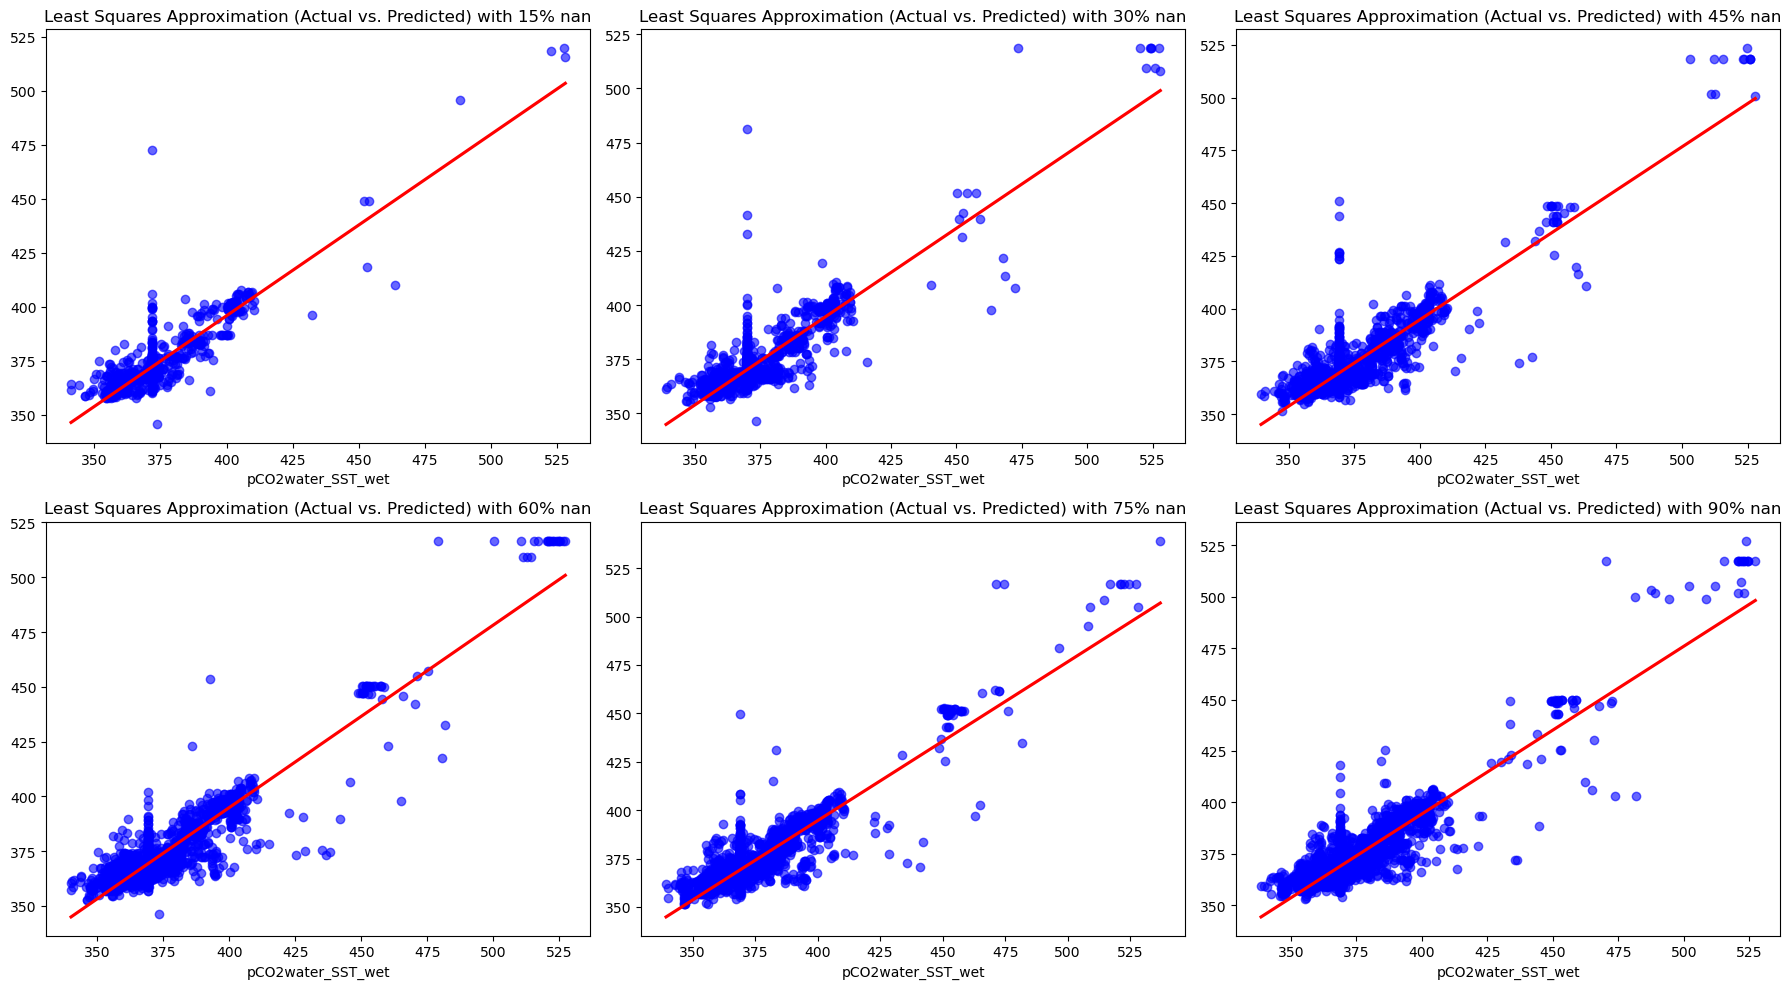

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()  # to fix the error AttributeError: 'numpy.ndarray' object has no attribute 'plot'

sns.regplot(x=y_test1, y=y_pred1, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ax=axes[0], ci=None)
axes[0].set_title("Least Squares Approximation (Actual vs. Predicted) with 15% nan")

sns.regplot(x=y_test2, y=y_pred2, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ax=axes[1], ci=None)
axes[1].set_title("Least Squares Approximation (Actual vs. Predicted) with 30% nan")

sns.regplot(x=y_test3, y=y_pred3, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ax=axes[2], ci=None)
axes[2].set_title("Least Squares Approximation (Actual vs. Predicted) with 45% nan")

sns.regplot(x=y_test4, y=y_pred4, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ax=axes[3], ci=None)
axes[3].set_title("Least Squares Approximation (Actual vs. Predicted) with 60% nan")

sns.regplot(x=y_test5, y=y_pred5, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ax=axes[4], ci=None)
axes[4].set_title("Least Squares Approximation (Actual vs. Predicted) with 75% nan")

sns.regplot(x=y_test6, y=y_pred6, scatter_kws={"color": "blue", "alpha": 0.6}, line_kws={"color": "red"}, ax=axes[5], ci=None)
axes[5].set_title("Least Squares Approximation (Actual vs. Predicted) with 90% nan")

plt.tight_layout()
plt.savefig('Nan_pco2_arabian.png', dpi=1000)
plt.show()